In [329]:
import pandas as pd
import numpy as np

In [330]:
df = pd.read_csv('../Datasets/Fruit Crops1.csv')
df.head()

N   P    K  temperature  humidity       ph    rainfall  label
0  130  53  255     30.43210  65.87654  6.12436  1200.65432  guava
1  115  45  215     28.65432  68.43210  5.95432  1100.76543  guava
2  145  58  275     32.54321  72.34567  6.42436  1500.43210  guava
3  125  50  240     33.87654  70.87654  6.22436  1300.65432  guava
4  135  55  260     31.98765  67.65432  6.35432  1400.76543  guava

In [331]:
df.tail()

N   P   K  temperature   humidity        ph    rainfall    label
1495  22   8  33    28.435729  95.884041  5.665785  203.928371  coconut
1496  28  27  32    28.940997  93.001090  5.764615  191.772309  coconut
1497  23  21  26    26.454887  93.450426  5.901496  149.222026  coconut
1498  37   5  34    25.794905  93.841506  5.779033  152.423871  coconut
1499  19  26  29    26.931419  98.803136  5.671549  166.571288  coconut

In [332]:
df.info

<bound method DataFrame.info of         N   P    K  temperature   humidity        ph     rainfall    label
0     130  53  255    30.432100  65.876540  6.124360  1200.654320    guava
1     115  45  215    28.654320  68.432100  5.954320  1100.765430    guava
2     145  58  275    32.543210  72.345670  6.424360  1500.432100    guava
3     125  50  240    33.876540  70.876540  6.224360  1300.654320    guava
4     135  55  260    31.987650  67.654320  6.354320  1400.765430    guava
...   ...  ..  ...          ...        ...       ...          ...      ...
1495   22   8   33    28.435729  95.884041  5.665785   203.928371  coconut
1496   28  27   32    28.940997  93.001090  5.764615   191.772309  coconut
1497   23  21   26    26.454887  93.450426  5.901496   149.222026  coconut
1498   37   5   34    25.794905  93.841506  5.779033   152.423871  coconut
1499   19  26   29    26.931419  98.803136  5.671549   166.571288  coconut

[1500 rows x 8 columns]>

In [333]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [334]:
df.shape

(1500, 8)

In [335]:
df.label.value_counts()

guava          100
strawberry     100
litchi         100
sugar cane     100
dates          100
pomegranate    100
banana         100
mango          100
grapes         100
watermelon     100
muskmelon      100
apple          100
orange         100
papaya         100
coconut        100
Name: label, dtype: int64

In [336]:
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

In [337]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=df['label'],
    y=df['N'],
    name='Nitrogen',
    marker_color='Blue'
))

fig.add_trace(go.Bar(
    x=df['label'],
    y=df['P'],
    name='Phosphorous',
    marker_color='darkgreen'
))

fig.add_trace(go.Bar(
    x=df['label'],
    y=df['K'],
    name='Potash',
    marker_color='crimson'
))

fig.update_layout(
    title="N, P, K values comparison between crops",
    barmode='group',
    xaxis_tickangle=-45
)

fig.show()

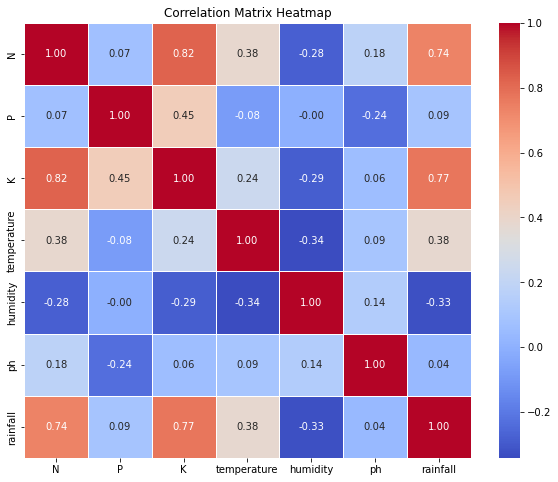

In [338]:
correlation_matrix = df.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

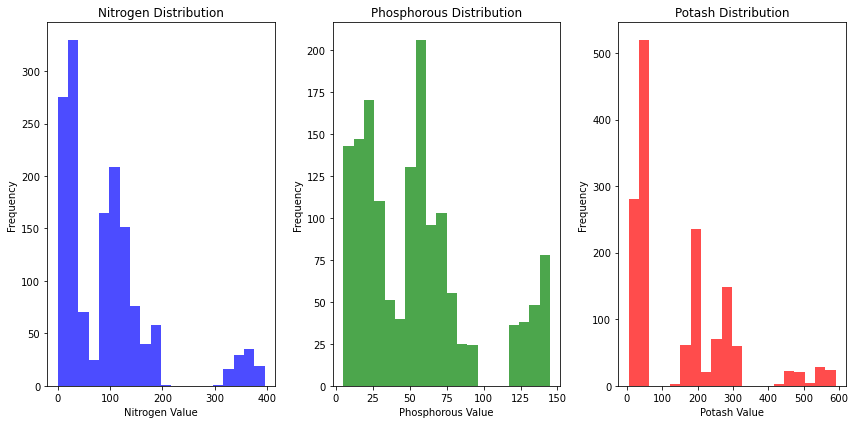

In [339]:
plt.figure(figsize=(12, 6))

plt.subplot(131)
plt.hist(df['N'], bins=20, color='blue', alpha=0.7)
plt.title('Nitrogen Distribution')
plt.xlabel('Nitrogen Value')
plt.ylabel('Frequency')

plt.subplot(132)
plt.hist(df['P'], bins=20, color='green', alpha=0.7)
plt.title('Phosphorous Distribution')
plt.xlabel('Phosphorous Value')
plt.ylabel('Frequency')

plt.subplot(133)
plt.hist(df['K'], bins=20, color='red', alpha=0.7)
plt.title('Potash Distribution')
plt.xlabel('Potash Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

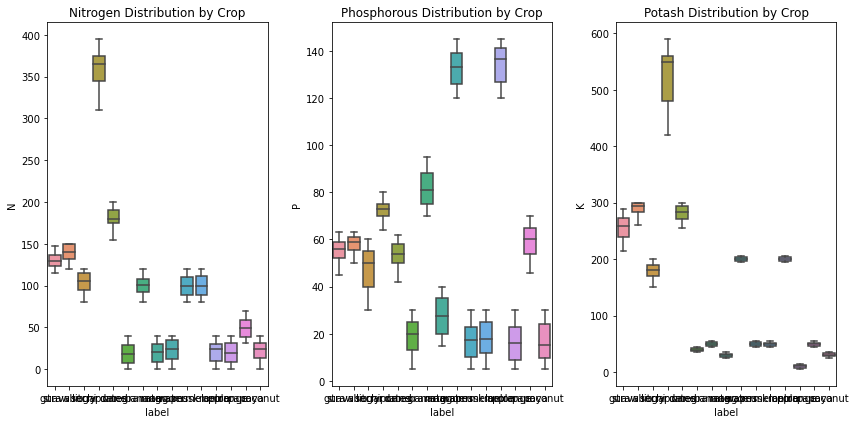

In [340]:
import seaborn as sns
plt.figure(figsize=(12, 6))

plt.subplot(131)
sns.boxplot(x='label', y='N', data=df)
plt.title('Nitrogen Distribution by Crop')

plt.subplot(132)
sns.boxplot(x='label', y='P', data=df)
plt.title('Phosphorous Distribution by Crop')

plt.subplot(133)
sns.boxplot(x='label', y='K', data=df)
plt.title('Potash Distribution by Crop')

plt.tight_layout()
plt.show()

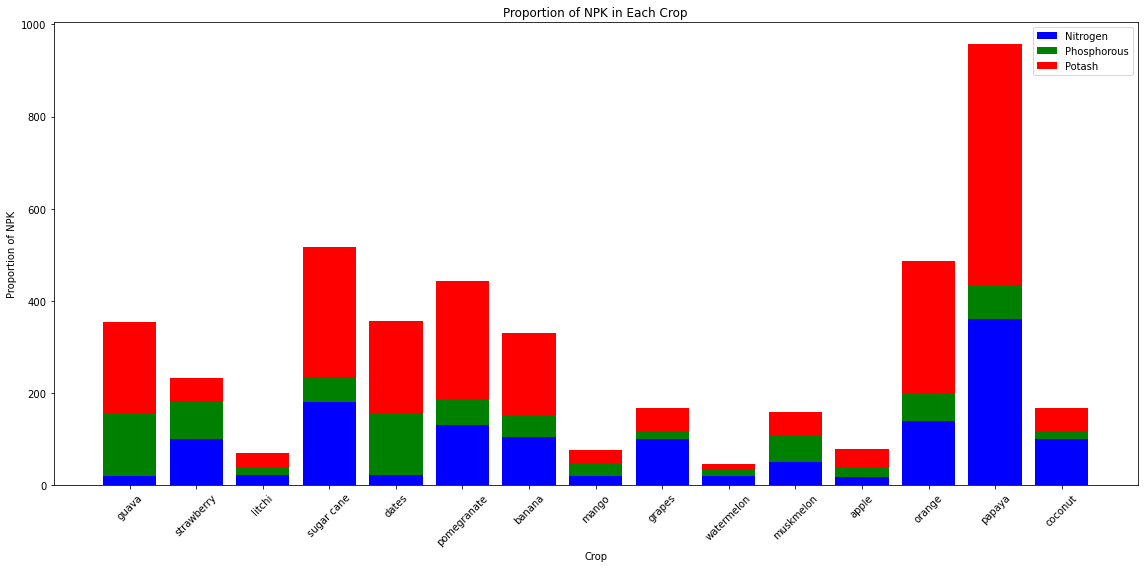

In [341]:
crop_npk_means = df.groupby('label')[['N', 'P', 'K']].mean()
crop_names = df['label'].unique()

# Create a stacked bar chart
fig, ax = plt.subplots(figsize=(16, 8))

# Plot Nitrogen (N) values
ax.bar(crop_names, crop_npk_means['N'], label='Nitrogen', color='blue')

# Plot Phosphorous (P) values on top of Nitrogen
ax.bar(crop_names, crop_npk_means['P'], bottom=crop_npk_means['N'], label='Phosphorous', color='green')

# Plot Potash (K) values on top of Nitrogen and Phosphorous
ax.bar(crop_names, crop_npk_means['K'], bottom=crop_npk_means['N'] + crop_npk_means['P'], label='Potash', color='red')

# Customize the chart
ax.set_xlabel('Crop')
ax.set_ylabel('Proportion of NPK')
ax.set_title('Proportion of NPK in Each Crop')
ax.legend()

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

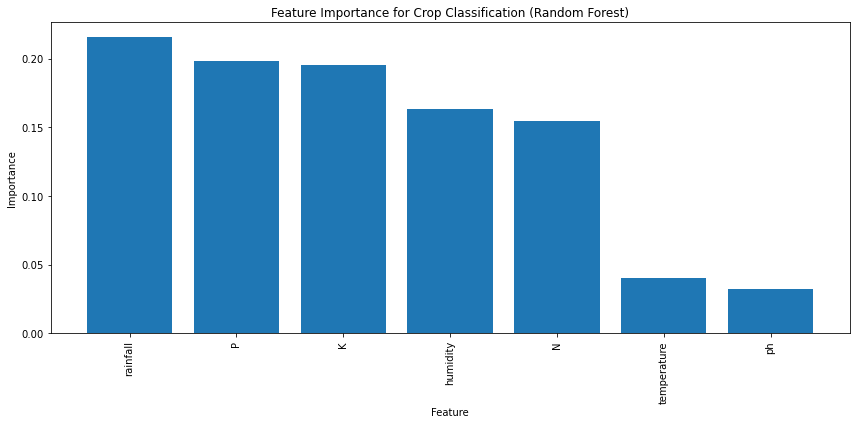

In [342]:
import matplotlib.pyplot as plt

# Fit a Random Forest Classifier on the entire dataset
rf_classifier = RandomForestClassifier(n_jobs=-1, random_state=42, n_estimators=10)
rf_classifier.fit(X_train, y_train)

# Get feature importances from the trained model
feature_importances = rf_classifier.feature_importances_

# Get feature names (column names)
feature_names = X.columns

# Sort features by importance in descending order
sorted_indices = feature_importances.argsort()[::-1]
sorted_importances = feature_importances[sorted_indices]
sorted_features = feature_names[sorted_indices]

# Create a bar chart to visualize feature importances
plt.figure(figsize=(12, 6))
plt.bar(range(len(sorted_features)), sorted_importances, align='center')
plt.xticks(range(len(sorted_features)), sorted_features, rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance for Crop Classification (Random Forest)')
plt.tight_layout()
plt.show()

In [343]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder().fit(df['label'])

In [344]:
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)

{'apple': 0, 'banana': 1, 'coconut': 2, 'dates': 3, 'grapes': 4, 'guava': 5, 'litchi': 6, 'mango': 7, 'muskmelon': 8, 'orange': 9, 'papaya': 10, 'pomegranate': 11, 'strawberry': 12, 'sugar cane': 13, 'watermelon': 14}


In [345]:
df['label'] = le.transform(df['label'])

In [346]:
df.head()

N   P    K  temperature  humidity       ph    rainfall  label
0  130  53  255     30.43210  65.87654  6.12436  1200.65432      5
1  115  45  215     28.65432  68.43210  5.95432  1100.76543      5
2  145  58  275     32.54321  72.34567  6.42436  1500.43210      5
3  125  50  240     33.87654  70.87654  6.22436  1300.65432      5
4  135  55  260     31.98765  67.65432  6.35432  1400.76543      5

In [347]:
from sklearn.model_selection import train_test_split

In [348]:
X = df.drop(['label'],axis=1)
y = df['label']

In [349]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [350]:
X_train.head()

N    P    K  temperature   humidity        ph     rainfall
382   340   69  465    32.432100  70.987650  6.087650  1674.765430
538     5   24   40    24.692258  93.870301  6.297908   104.673545
1493   22   16   27    29.179790  90.272143  6.006785   188.925208
1112   13  126  204    23.109427  92.796308  6.383180   108.183792
324   370   74  550    35.123450  77.432100  6.432100  1860.765430

In [351]:
X_test.head()

N    P    K  temperature   humidity        ph    rainfall
1116   36  140  198    23.343864  91.476847  6.281884  104.426799
1368   66   69   47    23.692122  93.610556  6.912300   87.533940
422   165   46  262    32.987650  69.654320  6.854320  248.432100
413   180   53  282    32.987650  62.876540  7.324360  276.765430
451   190   57  293    33.654320  71.654320  6.924360  285.765430

In [352]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1200, 7), (300, 7), (1200,), (300,))

In [353]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [354]:
step1 = MinMaxScaler()
step2 = RandomForestClassifier(n_jobs=-1, random_state=42, n_estimators=10)
pipe = Pipeline([('step1', step1), ('step2', step2)])

pipe.fit(X_train, y_train)

Pipeline(steps=[('step1', MinMaxScaler()),
                ('step2',
                 RandomForestClassifier(n_estimators=10, n_jobs=-1,
                                        random_state=42))])

In [355]:
from sklearn.svm import SVC

# Replace the Random Forest Classifier with a Support Vector Machine (SVM) classifier
step2 = SVC(kernel='linear', C=1, random_state=42)

# Create a new pipeline with the SVM classifier
pipe_svm = Pipeline([('step1', step1), ('step2', step2)])

# Train the SVM model
pipe_svm.fit(X_train, y_train)

# Predict using the SVM model
y_pred_svm = pipe_svm.predict(X_test)

# Evaluate the accuracy of the SVM model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print('Accuracy (SVM):', accuracy_svm)

Accuracy (SVM): 0.9366666666666666


In [356]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression

# Create instances of the classifiers
rf_classifier = RandomForestClassifier(n_jobs=-1, random_state=42, n_estimators=10)
svm_classifier = SVC(kernel='linear', C=1, random_state=42)
lr_classifier = LogisticRegression(random_state=42)

# Create a Voting Classifier with 'hard' voting (majority rule)
voting_classifier = VotingClassifier(estimators=[
    ('rf', rf_classifier),
    ('svm', svm_classifier),
    ('lr', lr_classifier)
], voting='hard')

# Create a pipeline including MinMax scaling
pipe_voting = Pipeline([('step1', step1), ('step2', voting_classifier)])

# Train the Voting Classifier
pipe_voting.fit(X_train, y_train)

# Predict using the Voting Classifier
y_pred_voting = pipe_voting.predict(X_test)

# Evaluate the accuracy of the Voting Classifier
accuracy_voting = accuracy_score(y_test, y_pred_voting)
print('Accuracy (Voting Classifier):', accuracy_voting)

Accuracy (Voting Classifier): 0.9366666666666666


In [357]:
from sklearn.ensemble import GradientBoostingClassifier

# Create a Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(random_state=42)

# Create a pipeline including MinMax scaling
pipe_gb = Pipeline([('step1', step1), ('step2', gb_classifier)])

# Train the Gradient Boosting Classifier
pipe_gb.fit(X_train, y_train)

# Predict using the Gradient Boosting Classifier
y_pred_gb = pipe_gb.predict(X_test)

# Evaluate the accuracy of the Gradient Boosting Classifier
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print('Accuracy (Gradient Boosting):', accuracy_gb)

Accuracy (Gradient Boosting): 0.9966666666666667


In [358]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [359]:
import xgboost as xgb

# Create an XGBoost Classifier
xgb_classifier = xgb.XGBClassifier(random_state=42)

# Create a pipeline including MinMax scaling
pipe_xgb = Pipeline([('step1', step1), ('step2', xgb_classifier)])

# Train the XGBoost Classifier
pipe_xgb.fit(X_train, y_train)

# Predict using the XGBoost Classifier
y_pred_xgb = pipe_xgb.predict(X_test)

# Evaluate the accuracy of the XGBoost Classifier
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print('Accuracy (XGBoost):', accuracy_xgb)

Accuracy (XGBoost): 0.9966666666666667


In [360]:
import joblib

In [361]:
joblib.dump(pipe, '../SavedModels/fruits1.joblib')

['../SavedModels/fruits1.joblib']

In [362]:
y_pred = pipe.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))

Accuracy: 1.0


In [363]:
for column in X.columns:
  print(column)

N
P
K
temperature
humidity
ph
rainfall


In [364]:
df = [[90,42,43,20.87,82.01,6.5,202.93]]

pipe.predict(df)[0]

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but MinMaxScaler was fitted with feature names



14